# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [ ]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f'Shape : {df_data.shape}')
print(f'Columns :{df_data.columns}')
print(f'Missing values?: {df_data.isna().values.any()}')
print(f'Any duplicates?: {df_data.duplicated().values.any()}')
df_data.head()

Shape : (2000, 96)
Columns :Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [ ]:
df_data.duplicated

<bound method DataFrame.duplicated of         ID  EARNINGS   S  EXP  FEMALE  MALE  BYEAR  AGE  AGEMBTH   HHINC97  \
0     4275     18.50  12 9.71       0     1   1984   27    24.00 64,000.00   
1     4328     19.23  17 5.71       0     1   1982   29    32.00  6,000.00   
2     8763     39.05  14 9.94       0     1   1981   30    23.00 88,252.00   
3     8879     16.80  18 1.54       0     1   1983   28    30.00       NaN   
4     1994     36.06  15 2.94       0     1   1984   27    23.00 44,188.00   
...    ...       ...  ..  ...     ...   ...    ...  ...      ...       ...   
1995  2456     14.00   8 7.87       1     0   1982   29    19.00  6,000.00   
1996  1119     14.83  18 1.92       1     0   1983   28    28.00 50,000.00   
1997  3561     35.88  18 2.67       1     0   1984   27    29.00 77,610.00   
1998  5980     25.48  16 4.71       1     0   1982   29    23.00 69,300.00   
1999  6221     13.33  14 6.48       1     0   1984   27    30.00 40,020.00   

      ...  URBAN  REGNE  

In [ ]:
new_df = df_data.drop_duplicates()
new_df

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2400,9.00,12,10.83,1,0,1982,29,29.00,"73,100.00",...,0,0,0,1,0,0,0,1,0,0
1989,3018,8.00,12,9.37,1,0,1982,29,23.00,"66,300.00",...,1,0,1,0,0,0,1,0,0,0
1991,4550,8.57,17,6.29,1,0,1984,27,25.00,"76,300.00",...,0,0,0,0,1,0,1,0,0,0
1994,3779,9.33,12,9.12,1,0,1984,27,22.00,NaN,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
new_df = new_df.fillna(0)
new_df.isna().values.any()

False

## Descriptive Statistics

In [ ]:
new_df.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,25.72,"47,252.43",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,6.38,"45,629.92",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,22.00,"13,740.50",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"41,840.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"66,400.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


The data shows persons earnings and their personal information such as their working experience( by year of working ), ages, gender, and their family condition and status.

## Visualise the Features

1.   EARNINGS
2.   S
3. EXP





EARNINGS

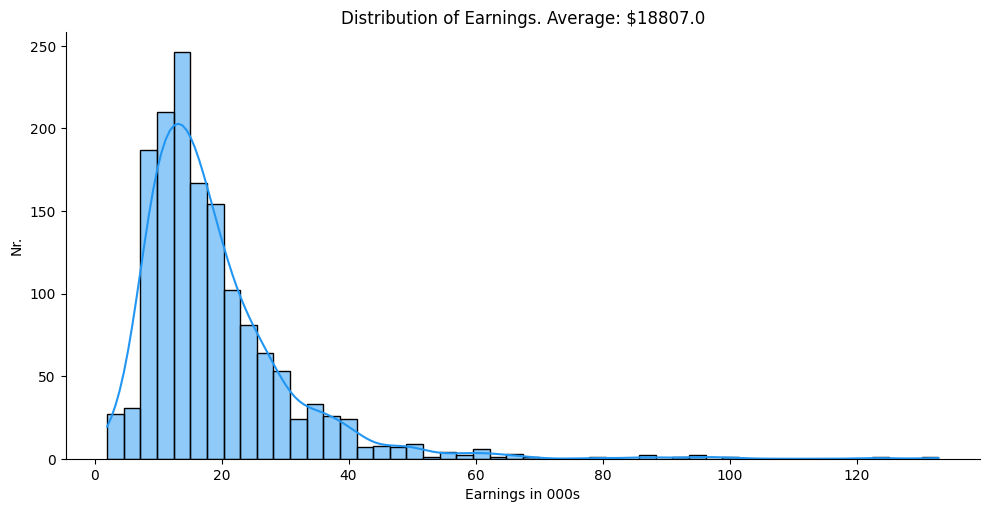

In [ ]:
sns.displot(new_df['EARNINGS'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Distribution of Earnings. Average: ${(1000*new_df.EARNINGS.mean()):.6}')
plt.xlabel('Earnings in 000s')
plt.ylabel('Nr.')

plt.show()

S

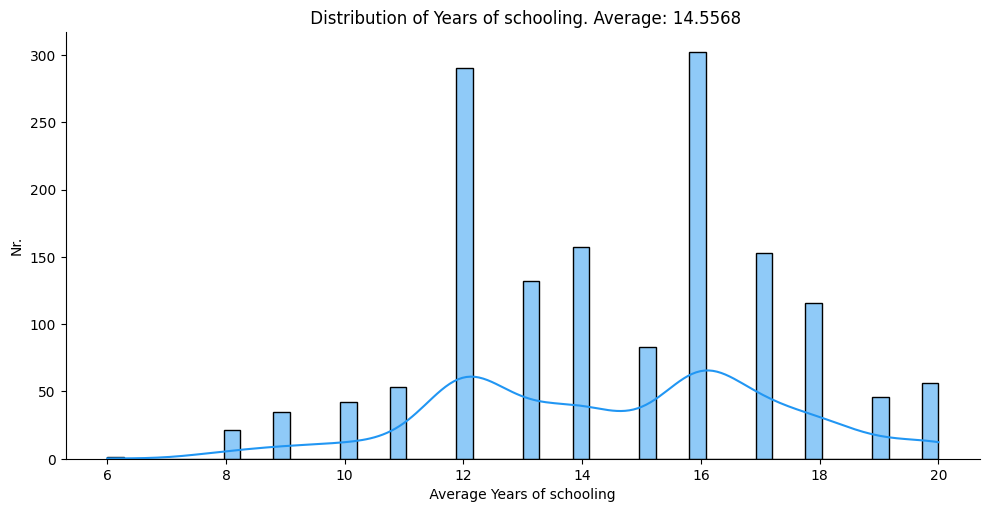

In [ ]:
sns.displot(new_df['S'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f' Distribution of Years of schooling. Average: {(new_df.S.mean()):.6}')
plt.xlabel(' Average Years of schooling ')
plt.ylabel('Nr.')

plt.show()

EXP

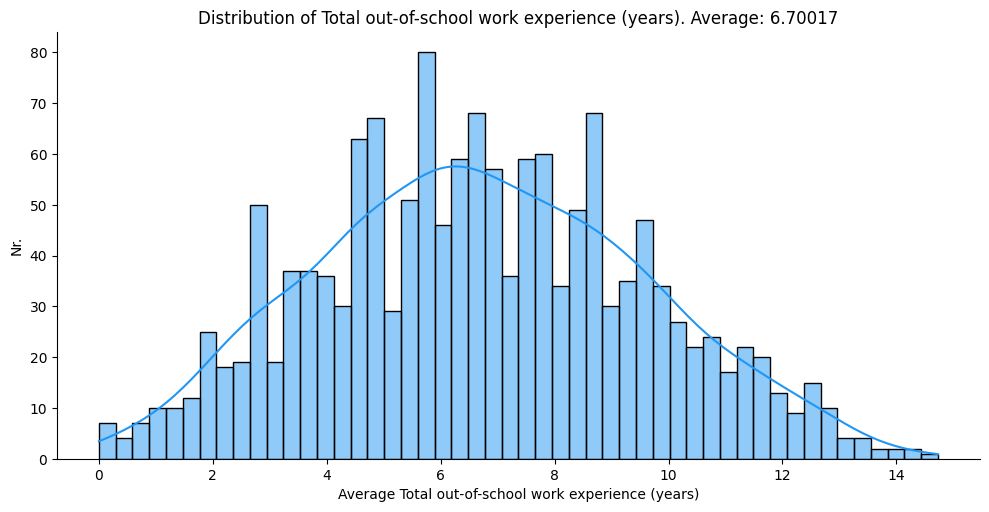

In [ ]:
sns.displot(new_df['EXP'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Distribution of Total out-of-school work experience (years). Average: {(new_df.EXP.mean()):.6}')
plt.xlabel('Average Total out-of-school work experience (years)')
plt.ylabel('Nr.')

plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

S

In [ ]:
new_df

,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",402.00,...,1,0,0,1,0,0,0,1,0,0
1,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",38.00,...,2,0,0,1,0,0,1,0,0,0
2,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",555.00,...,1,0,0,0,1,0,0,1,0,0
3,16.80,18,1.54,0,1,1983,28,30.00,0.00,0.00,...,1,0,1,0,0,0,1,0,0,0
4,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",278.00,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,9.00,12,10.83,1,0,1982,29,29.00,"73,100.00",390.00,...,0,0,0,1,0,0,0,1,0,0
1989,8.00,12,9.37,1,0,1982,29,23.00,"66,300.00",354.00,...,1,0,1,0,0,0,1,0,0,0
1991,8.57,17,6.29,1,0,1984,27,25.00,"76,300.00",364.00,...,0,0,0,0,1,0,1,0,0,0
1994,9.33,12,9.12,1,0,1984,27,22.00,0.00,0.00,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
target = new_df['S']
features = new_df.drop('S', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


In [ ]:
new_df

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,0.00,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2400,9.00,12,10.83,1,0,1982,29,29.00,"73,100.00",...,0,0,0,1,0,0,0,1,0,0
1989,3018,8.00,12,9.37,1,0,1982,29,23.00,"66,300.00",...,1,0,1,0,0,0,1,0,0,0
1991,4550,8.57,17,6.29,1,0,1984,27,25.00,"76,300.00",...,0,0,0,0,1,0,1,0,0,0
1994,3779,9.33,12,9.12,1,0,1984,27,22.00,0.00,...,1,0,0,1,0,0,1,0,0,0


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)
regression.score(X_train, y_train)

0.8663442220808504

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [ ]:
coef = regression.coef_
intercept = regression.intercept_
rsquared = regression.score(X_train, y_train)


In [ ]:
regr_coef = pd.DataFrame(data=coef, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
ID,-0.00
EARNINGS,0.01
EXP,-0.31
FEMALE,0.15
MALE,-0.15
...,...
MSA11NO,-0.04
MSA11NCC,-0.03
MSA11CC,0.04
MSA11NK,0.03


In [ ]:
earn = regr_coef.loc['EARNINGS'].values[0] * 1000
print(f'The extra dollars can one expect to earn for an additional year of schooling ${earn:.5}')

The extra dollars can one expect to earn for an additional year of schooling $0.012532


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [ ]:
predicted_values = regression.predict(X_train)
residuals = (y_train - predicted_values)

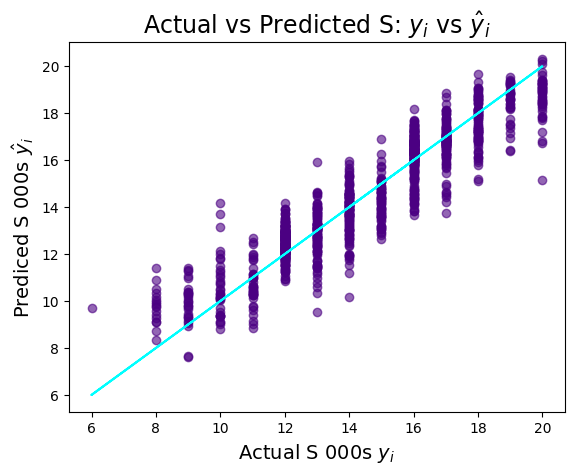

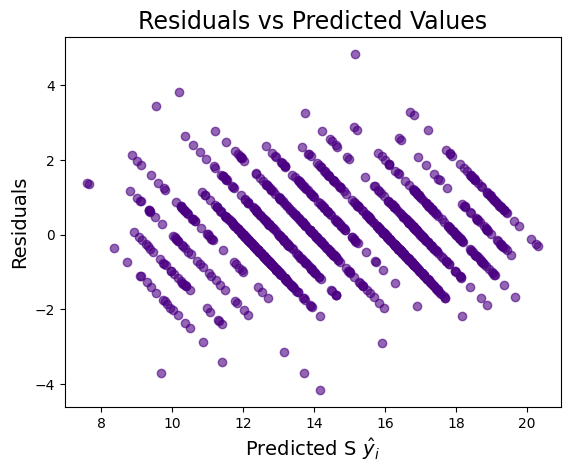

In [ ]:
# Original Regression of Actual vs. Predicted S
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted S: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual S 000s $y _i$', fontsize=14)
plt.ylabel('Prediced S 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted S $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

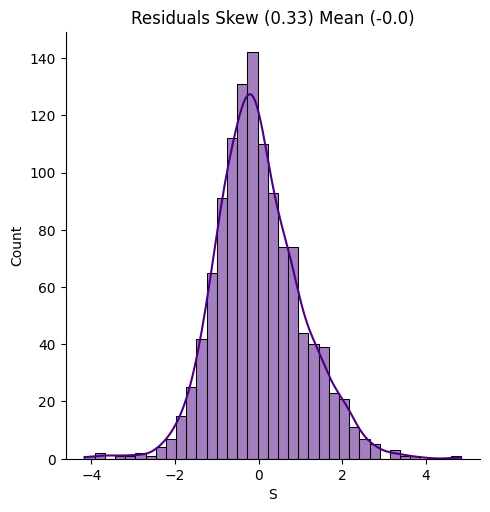

In [ ]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

The skewness value is too small.

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [ ]:
new_target = np.log(new_df['S']) 
features = new_df.drop('S', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.85


### Evaluate the Coefficients of the Model

In [ ]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

,coef
ID,-0.00
EARNINGS,0.00
EXP,-0.02
FEMALE,0.01
MALE,-0.01
...,...
MSA11NO,-0.01
MSA11NCC,-0.00
MSA11CC,-0.00
MSA11NK,0.02


### Analyse the Estimated Values & Regression Residuals

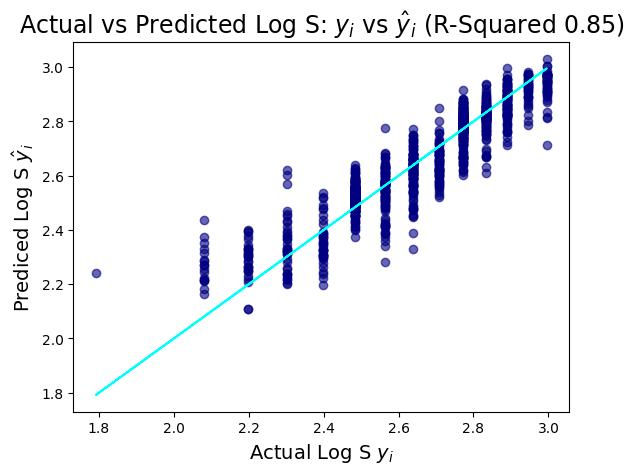

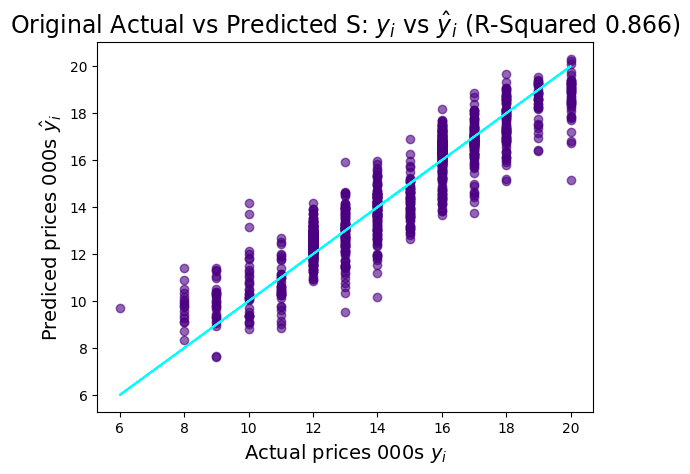

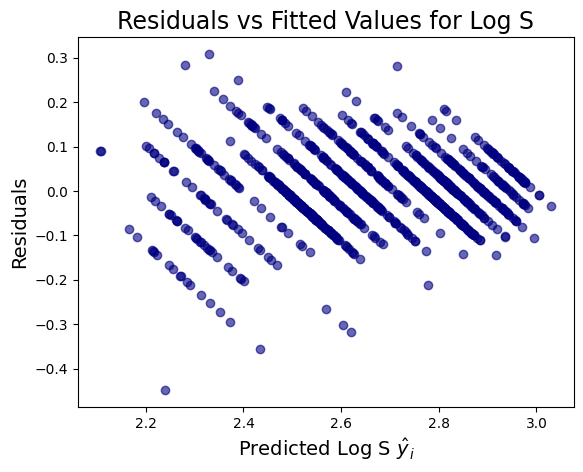

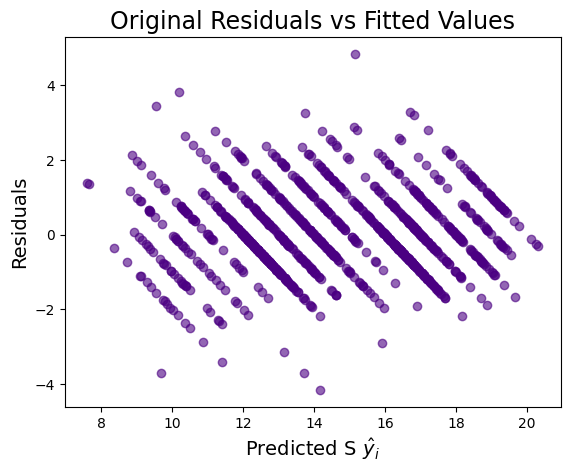

In [ ]:
# Graph of Actual vs. Predicted Log S
plt.scatter(x=log_y_train, y=log_predictions, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log S: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log S $y _i$', fontsize=14)
plt.ylabel('Prediced Log S $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs. Predicted S
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted S: $y _i$ vs $\hat y_i$ (R-Squared {rsquared:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values (Log S)
plt.scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log S', fontsize=17)
plt.xlabel('Predicted Log S $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted S $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()



# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [ ]:
features = new_df.drop(['S'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,ID,EARNINGS,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,"3,547.13",18.81,6.70,0.49,0.51,"1,982.07",28.93,25.72,"47,252.43",293.07,...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00


In [ ]:
# Make prediction
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log S estimate is ${log_estimate:.3}')

# Convert Log S to Acutal earn Values
earn_est = np.e**log_estimate * 1000
# or use
earn_est = np.exp(log_estimate)
print(f'The property is estimated to be worth ${earn_est:.6}')

The log S estimate is $2.66
The property is estimated to be worth $14.2771


In [ ]:
property_stats['EXP'] = 5
property_stats['EDUCBA'] = 1

# Make prediction
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log S estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
earn_est = np.e**log_estimate
print(f'The property is estimated to be worth ${earn_est:.6}')

The log S estimate is $2.77
The property is estimated to be worth $15.8825


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 